# Graduation Rate Drivers #

### Dhruv Hemmady ###

## Step 1: Reading the data

Let's convert all our tables into DataFrames.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_SS1300A15 = pd.read_csv('SS1300A15.dat', sep='|')
df_SS1300A16 = pd.read_csv('SS1300A16.dat', sep='|')
df_SS1300A17 = pd.read_csv('SS1300A17.dat', sep='|')
df_SS1300A18 = pd.read_csv('SS1300A18.dat', sep='|')
df_grad = pd.read_csv("Graduation_Rates.csv")

Next, let's join the Finance DataFrames step by step on the column GEO_ID. 

In [2]:
cols_to_use = df_SS1300A15.columns.difference(df_SS1300A16.columns)
cols = list(cols_to_use)
cols.append("GEO_ID")
first_two = pd.merge(df_SS1300A16, df_SS1300A15[cols], on="GEO_ID")

In [3]:
cols_to_use = first_two.columns.difference(df_SS1300A17.columns)
cols = list(cols_to_use)
cols.append("GEO_ID")
first_three = pd.merge(df_SS1300A17, first_two[cols], on="GEO_ID")

Finally, let's convert values in GEO_ID to integers, and rename the column to leaid11 before joining with the Graduation DataFrame.

In [4]:
cols_to_use = first_three.columns.difference(df_SS1300A18.columns)
cols = list(cols_to_use)
cols.append("GEO_ID")
first_four = pd.merge(df_SS1300A18, first_three[cols], on="GEO_ID")
first_four['GEO_ID'] = [int(string[-7:]) for string in first_four['GEO_ID']]
first_four.rename(columns={'GEO_ID': 'leaid11'}, inplace=True)

In [5]:
cols_to_use = first_four.columns.difference(df_grad.columns)
cols = list(cols_to_use)
cols.append("leaid11")
grad_rates = pd.merge(df_grad, first_four[cols], on="leaid11")
grad_rates.head()

,STNAM,FIPST,leaid11,leanm11,ALL_COHORT_1112,ALL_RATE_1112,MAM_COHORT_1112,MAM_RATE_1112,MAS_COHORT_1112,MAS_RATE_1112,...,SCHSDREVSS_P,SCHSDREVSS_P_F,SCHSDTOTEXP,SCHSDTOTEXP_F,SCHSDTOTREV,SCHSDTOTREV_F,SCHSDTOTREV_P,SCHSDTOTREV_P_F,ST,YEAR
0,ALABAMA,1,100005,Albertville City,268,83,NaN,NaN,NaN,NaN,...,59.4,NaN,38123,NaN,38214,NaN,100.0,NaN,1,2013
1,ALABAMA,1,100006,Marshall County,424,79,2.0,PS,1.0,PS,...,62.0,NaN,53182,NaN,55128,NaN,100.0,NaN,1,2013
2,ALABAMA,1,100007,Hoover City,1042,91,1.0,PS,71.0,85-89,...,41.1,NaN,165188,NaN,152769,NaN,100.0,NaN,1,2013
3,ALABAMA,1,100008,Madison City,836,91,4.0,PS,44.0,GE90,...,51.9,NaN,93475,NaN,93497,NaN,100.0,NaN,1,2013
4,ALABAMA,1,100011,Leeds City,117,70-74,NaN,NaN,NaN,NaN,...,56.5,NaN,17605,NaN,15342,NaN,100.0,NaN,1,2013


## Step 2: EDA (Explore and clean the data)

In [6]:
grad_rates.shape

(10170, 143)

In [7]:
grad_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10170 entries, 0 to 10169
Columns: 143 entries, STNAM to YEAR
dtypes: float64(76), int64(54), object(13)
memory usage: 11.2+ MB


In [8]:
grad_rates.isnull().sum()

STNAM                      0
FIPST                      0
leaid11                    0
leanm11                    0
ALL_COHORT_1112            0
ALL_RATE_1112              0
MAM_COHORT_1112         6234
MAM_RATE_1112           6234
MAS_COHORT_1112         4910
MAS_RATE_1112           4910
MBL_COHORT_1112         3771
MBL_RATE_1112           3771
MHI_COHORT_1112         2750
MHI_RATE_1112           2750
MTR_COHORT_1112         5865
MTR_RATE_1112           5865
MWH_COHORT_1112          133
MWH_RATE_1112            133
CWD_COHORT_1112          369
CWD_RATE_1112            369
ECD_COHORT_1112          185
ECD_RATE_1112            185
LEP_COHORT_1112         5437
LEP_RATE_1112           5437
FOOTID_GEO             10170
GEOTYPE                    0
GEO_TTL                    0
SCHENROLL                  0
SCHENROLL_F            10170
SCHEXPCO                   0
                       ...  
SCHSDREVFSDSTIT_P          0
SCHSDREVFSDSTIT_P_F    10170
SCHSDREVFS_P               0
SCHSDREVFS_P_F

Let's drop all columns with any null values.

In [9]:
grad_rates.dropna(axis=1, inplace=True)
grad_rates.isnull().sum()

STNAM                0
FIPST                0
leaid11              0
leanm11              0
ALL_COHORT_1112      0
ALL_RATE_1112        0
GEOTYPE              0
GEO_TTL              0
SCHENROLL            0
SCHEXPCO             0
SCHEXPCSFEB          0
SCHEXPCSFEB_PP       0
SCHEXPCSFSW          0
SCHEXPCSFSW_PP       0
SCHEXPCSIEB          0
SCHEXPCSIEB_PP       0
SCHEXPCSISW          0
SCHEXPCSISW_PP       0
SCHEXPCSIT           0
SCHEXPCSIT_PP        0
SCHEXPCSOF           0
SCHEXPCSSGA          0
SCHEXPCSSGA_PP       0
SCHEXPCSSIS          0
SCHEXPCSSIS_PP       0
SCHEXPCSSPS          0
SCHEXPCSSPS_PP       0
SCHEXPCSSSA          0
SCHEXPCSSSA_PP       0
SCHEXPCSST           0
                    ..
SCHREVLSCC           0
SCHREVLSOLR          0
SCHREVLSOS           0
SCHREVLSPGC          0
SCHREVLSPT           0
SCHREVLSTT           0
SCHREVSS             0
SCHREVSSGFA          0
SCHREVSSSE           0
SCHREVSSTP           0
SCHSDEXPCS           0
SCHSDEXPCSSON        0
SCHSDEXPOPG

In [10]:
grad_rates.shape

(10170, 67)

Let's examine our target graduation rate column, ALL_RATE_1112.

In [11]:
grad_rates['ALL_RATE_1112'].value_counts()

90-94    997
GE90     885
GE80     797
85-89    714
GE95     683
GE50     505
80-84    501
80-89    429
75-79    277
92       185
93       168
70-74    165
91       164
94       161
90       155
70-79    153
95       144
89       139
PS       139
85       135
88       134
86       134
87       129
81       120
96       119
84       114
97       114
83       109
65-69     96
82        90
        ... 
52         5
30-34      4
49         4
46         3
50         3
LE5        3
LE20       3
55         3
51         3
48         3
44         3
54         3
47         3
20         2
20-24      2
35-39      2
45         2
42         1
18         1
LE10       1
27         1
43         1
37         1
30         1
41         1
20-29      1
36         1
31         1
40         1
25-29      1
Name: ALL_RATE_1112, Length: 101, dtype: int64

Let's create a function that changes all values in our graduation rate column into floats.

In [12]:
rate = []            
for number in grad_rates['ALL_RATE_1112']:
    # if value is null or PS insert 0
    if (pd.isnull(number)) | (number == 'PS'):
        rate.append(0)
    else:
        # change value to float
        try:
            rate.append(float(number))
        except:
            # if fails try read 2 last and first digits from value which are the boundries and take average
            try:
                rate.append(float((float(number[:2]) + float(number[-2:]))/2))
            except:
                # when greater or equal or grater than add 5 to the value
                if (number[:2] == 'GE') | (number[:2] == 'GT'):
                    rate.append(min(100, float(number[2:]) + 5.0))
                # when less or equal or less than subtract 5 from the value
                elif (number[:2] == 'LE') | (number[:2] == 'LT'):
                    rate.append(max(0, float(number[2:]) - 5.0))
                # else take average when single digits
                else:
                    rate.append(float((float(number[:1]) + float(number[-1:]))/2))
            
            
grad_rates['ALL_RATE_1112'] = rate

In [13]:
grad_rates['ALL_RATE_1112'].value_counts()

92.0     1182
95.0     1029
85.0      932
87.0      843
100.0     727
82.0      591
55.0      508
84.5      429
77.0      359
72.0      218
93.0      168
91.0      164
94.0      161
90.0      155
74.5      153
0.0       142
89.0      139
86.0      134
88.0      134
67.0      131
81.0      120
96.0      119
84.0      114
97.0      114
83.0      109
69.5       89
80.0       88
78.0       88
79.0       85
62.0       76
         ... 
47.0       11
58.0        9
56.0        9
60.0        8
44.5        8
42.0        7
30.0        6
34.5        6
53.0        5
32.0        4
49.0        4
15.0        3
48.0        3
46.0        3
37.0        3
44.0        3
54.0        3
50.0        3
51.0        3
27.0        2
20.0        2
22.0        2
24.5        1
18.0        1
5.0         1
36.0        1
43.0        1
41.0        1
40.0        1
31.0        1
Name: ALL_RATE_1112, Length: 81, dtype: int64

In [14]:
grad_rates_corr = grad_rates.corr().sort_values('ALL_RATE_1112', ascending=False)
grad_rates_corr

,FIPST,leaid11,ALL_COHORT_1112,ALL_RATE_1112,GEOTYPE,SCHENROLL,SCHEXPCO,SCHEXPCSFEB,SCHEXPCSFEB_PP,SCHEXPCSFSW,...,SCHSDREVLSTPGC_P,SCHSDREVLS_P,SCHSDREVSSGFA_P,SCHSDREVSSON,SCHSDREVSS_P,SCHSDTOTEXP,SCHSDTOTREV,SCHSDTOTREV_P,ST,YEAR
ALL_RATE_1112,0.083277,0.083634,-0.016492,1.000000,NaN,-0.020523,-0.023554,-0.027357,-0.143647,-0.018403,...,0.132370,0.149318,-0.070803,-0.032516,-0.083398,-0.025271,-0.024034,-0.003824,0.083277,NaN
SCHSDREVLS_P,0.098026,0.099329,0.016815,0.149318,NaN,0.002568,0.024373,0.025193,0.195246,0.031674,...,0.931328,1.000000,-0.840483,-0.020587,-0.948124,0.028788,0.031343,0.021358,0.098026,NaN
SCHSDREVLSTPGC_P,0.153066,0.154576,0.027856,0.132370,NaN,0.017713,0.035706,0.043476,0.198487,0.049762,...,1.000000,0.931328,-0.798658,-0.006886,-0.888021,0.046100,0.048582,0.017195,0.153066,NaN
SCHSDREVLSC_P,-0.066168,-0.066121,-0.035638,0.102562,NaN,-0.033361,-0.049914,-0.081110,-0.236135,-0.060323,...,-0.055745,0.056520,0.043434,-0.060326,-0.020265,-0.063237,-0.064675,0.013457,-0.066168,NaN
leaid11,0.999954,1.000000,-0.077701,0.083634,NaN,-0.054948,-0.036451,-0.054572,0.010643,-0.042959,...,0.154576,0.099329,0.036142,-0.072775,-0.088338,-0.043707,-0.045298,0.009218,0.999954,NaN
FIPST,1.000000,0.999954,-0.077363,0.083277,NaN,-0.054592,-0.036316,-0.054137,0.011297,-0.042608,...,0.153066,0.098026,0.037331,-0.072569,-0.086990,-0.043377,-0.044952,0.009397,1.000000,NaN
ST,1.000000,0.999954,-0.077363,0.083277,NaN,-0.054592,-0.036316,-0.054137,0.011297,-0.042608,...,0.153066,0.098026,0.037331,-0.072569,-0.086990,-0.043377,-0.044952,0.009397,1.000000,NaN
SCHREVLSOS,-0.080391,-0.080279,0.354517,0.037049,NaN,0.336357,0.307185,0.404947,0.063308,0.360463,...,-0.020365,0.045354,-0.047423,0.355233,-0.041308,0.361746,0.363061,0.002788,-0.080391,NaN
SCHSDREVLSNLG_P,-0.116948,-0.117603,-0.026862,0.034376,NaN,-0.038888,-0.034779,-0.031998,0.062283,-0.039021,...,-0.209258,0.122840,-0.087003,-0.022463,-0.106532,-0.037242,-0.037116,0.004567,-0.116948,NaN
SCHREVLSPT,-0.011692,-0.011512,0.804735,0.025047,NaN,0.828997,0.705510,0.723715,0.024766,0.807046,...,0.187260,0.170175,-0.187562,0.627932,-0.177227,0.814438,0.810138,0.002912,-0.011692,NaN


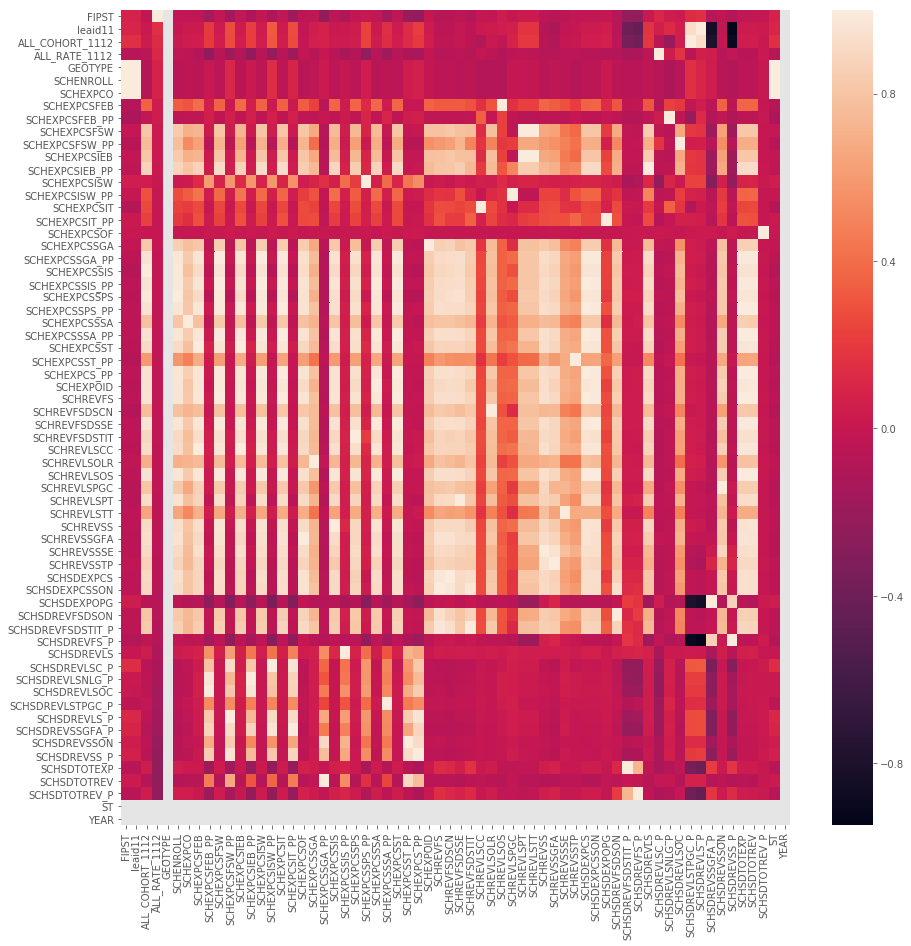

In [15]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(grad_rates_corr, xticklabels=grad_rates_corr.columns, yticklabels=grad_rates_corr.columns, ax=ax)

ALL_RATE_1112 is not highly correlated with any of the other columns. The strongest correlation is negatively with SCHSDREVFS_P, share of revenue from federal sources. Let's examine the relationship visually.

Text(0,0.5,'Graduation Rate')

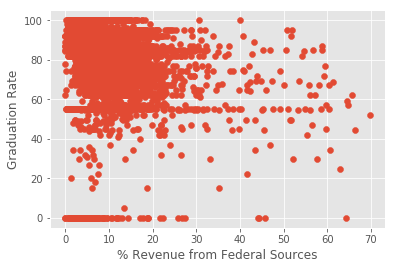

In [16]:
plt.scatter(grad_rates['SCHSDREVFS_P'], grad_rates['ALL_RATE_1112'])
plt.xlabel('% Revenue from Federal Sources')
plt.ylabel('Graduation Rate')

Not a strong, discernable relationship. So let's see if we can learn more about what features drive graduation rates through fitting a model.

## Step 3: Analysis with Machine Learning modeling, training and prediction

Now let's convert all graduation rates equal or above 90% to 1 and below 90% to 0, since we are examining what features determine whether or not that rate is acheived.

In [17]:
grad_rates['ALL_RATE_1112'] = grad_rates['ALL_RATE_1112'].apply(lambda x: 1 if x >= 90.0 else 0)
grad_rates['ALL_RATE_1112'].head()

0    0
1    0
2    1
3    1
4    0
Name: ALL_RATE_1112, dtype: int64

Let's choose only numeric features.

In [18]:
features = set(grad_rates.columns)
features = list(features - set(['ALL_RATE_1112', 'GEOTYPE', 'YEAR', 'STNAM', 'leanm11', 'GEO_TTL']))

Next, let's import all our machine learning models and metrics.

In [19]:
from sklearn.linear_model import LinearRegression, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, Imputer, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

/Users/dhruv/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
X = grad_rates[features]
y = grad_rates['ALL_RATE_1112']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Let's use a Gradient Boosting classification model.

In [21]:
# l1_ratios = np.arange(.1, 1.0, .01)
# el = ElasticNetCV()
# loreg = LogisticRegression()
# dtc = DecisionTreeClassifier()
ss=StandardScaler()
gb = GradientBoostingClassifier(random_state=42)

pipe=Pipeline([
    ("ss",ss),
    ("gb", gb),

])

In [22]:
gb_params = {
    'max_depth': [2, 3],
    'n_estimators': [75, 100, 125],
    "max_features": ["auto", None]
}
gs_gb = GridSearchCV(gb, gb_params)
gs_gb.fit(X_train, y_train)
print(gs_gb.best_score_)
gs_gb.best_params_

0.8121148551199685


{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}

In [23]:
gs_gb.score(X_test, y_test)

0.7919779787652379

In [24]:
pred = gs_gb.predict(X_test)

Let's take a look at our classification report to examine accuracy of our predictions.

In [25]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83      1572
          1       0.73      0.73      0.73       971

avg / total       0.79      0.79      0.79      2543



Next, let's visualize the relationship between our false positives and true positives via the ROC curve.

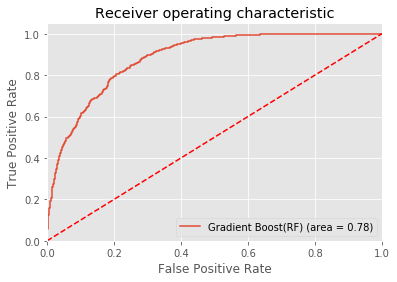

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gs_gb_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, gs_gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boost(RF) (area = %0.2f)' % gs_gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Our model has pretty high accuracy, since it's close to the upper left corner (high sensitivity and specificity).

Finally, let's use recursive feature elimination to rank the features that are the biggest drivers of graduation rates.

In [27]:
# from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# X, y = grad_rates(n_samples=50, n_features=10, random_state=0)
estimator = gb
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)
selector.support_ 

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False])

In [28]:
selector.ranking_

array([49, 34, 56, 42, 19, 21, 24, 23,  8,  1, 32, 13, 48,  2, 12, 50, 29,
       54, 55, 46, 57, 40, 28, 36, 30, 16,  3, 47,  9, 20,  6, 52, 44, 38,
       10, 11, 26, 41,  1, 35, 51, 33,  1, 37, 45, 22, 14, 27, 31,  5, 18,
        7, 25, 39, 53, 17,  1,  4, 43,  1, 15])

In [29]:
df_feature_ranking = pd.DataFrame()
df_feature_ranking["Features"] = features
df_feature_ranking["selector.ranking"] = selector.ranking_

In [30]:
# Rank 1 is the best
df_feature_ranking.head(5)

,Features,selector.ranking
0,SCHEXPCSST,49
1,SCHSDTOTEXP,34
2,SCHSDTOTREV_P,56
3,SCHEXPCSSGA,42
4,SCHSDREVLSNLG_P,19


In [31]:
# df.sort_values(by=['col1'])
df_feature_ranking.sort_values(by = ["selector.ranking"]).head(15)

,Features,selector.ranking
56,leaid11,1
59,SCHREVFSDSTIT,1
42,ALL_COHORT_1112,1
38,SCHEXPCSIEB_PP,1
9,SCHSDREVFSDSTIT_P,1
13,SCHSDREVFS_P,2
26,SCHSDREVLSC_P,3
57,SCHEXPCSISW_PP,4
49,SCHEXPCSST_PP,5
30,SCHSDREVLS_P,6


Based on the above analysis, the features that drive most drive whether school graduation rates are above 90% or not are ALL_COHORT_1112 (size of the school's cohort), SCHSDREVFSDSTIT_P (Percent Revenue from Federal Sources), SCHREVFSDSTIT (Revenue from Federal Sources in Dollars), SCHEXPCSIEB_PP (Spending on Teacher Benefits in Dollars) and leaid11 (geographic location - state, city, district).